# Import Libraries

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler

# Set the random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Load Preprocessed Data

In [2]:
# Load the preprocessed dataset
file_path = "Dataset/Transformed_Retail_Transaction_Dataset.csv"
df = pd.read_csv(file_path)

# Convert 'Date' to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set 'Date' as the index
df.set_index('Date', inplace=True)

# Inspect the first few rows
print(df.head())

            Total Sales
Date                   
2023-12-26   455.862764
2023-08-05   258.306546
2024-03-11   212.015651
2023-10-27   461.343769
2023-12-22   626.030484


# Prepare Data for Training

In [3]:
# Scaling the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df['Total Sales'].values.reshape(-1, 1))

# Create sequences
def create_sequences(data, seq_length):
    xs = []
    ys = []
    for i in range(len(data)-seq_length):
        x = data[i:i+seq_length]
        y = data[i+seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

# Sequence length
seq_length = 30

# Create sequences
X, y = create_sequences(scaled_data, seq_length)

# Split data into training and testing sets
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

print(f'Training set shape: {X_train.shape}, {y_train.shape}')
print(f'Test set shape: {X_test.shape}, {y_test.shape}')

Training set shape: (79976, 30, 1), (79976, 1)
Test set shape: (19994, 30, 1), (19994, 1)


# Build and Train the Model

Epoch 1/10
79976/79976 [==============================] - 1485s 19ms/step - loss: 0.0436 - val_loss: 0.0434
Epoch 2/10
79976/79976 [==============================] - 1759s 22ms/step - loss: 0.0433 - val_loss: 0.0438
Epoch 3/10
79976/79976 [==============================] - 1753s 22ms/step - loss: 0.0433 - val_loss: 0.0434
Epoch 4/10
79976/79976 [==============================] - 1664s 21ms/step - loss: 0.0433 - val_loss: 0.0434
Epoch 5/10
79976/79976 [==============================] - 1765s 22ms/step - loss: 0.0433 - val_loss: 0.0433
Epoch 6/10
79976/79976 [==============================] - 1576s 20ms/step - loss: 0.0433 - val_loss: 0.0434
Epoch 7/10
79976/79976 [==============================] - 1754s 22ms/step - loss: 0.0433 - val_loss: 0.0434
Epoch 8/10
79976/79976 [==============================] - 1818s 23ms/step - loss: 0.0433 - val_loss: 0.0434
Epoch 9/10
79976/79976 [==============================] - 1784s 22ms/step - loss: 0.0433 - val_loss: 0.0433
Epoch 10/10
79976/79976 [===

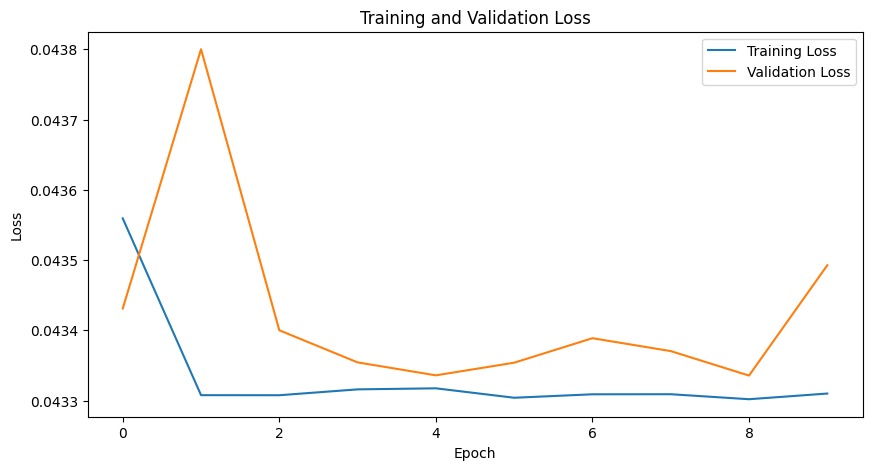

In [4]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(seq_length, 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, batch_size=1, epochs=10, validation_data=(X_test, y_test))

# Plot the training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Make Predictions

625/625 [==============================] - 11s 16ms/step


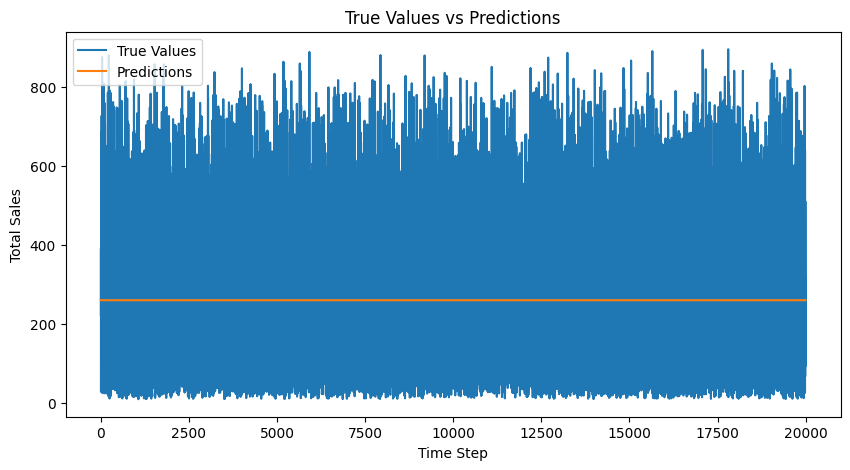

625/625 [==============================] - 9s 14ms/step


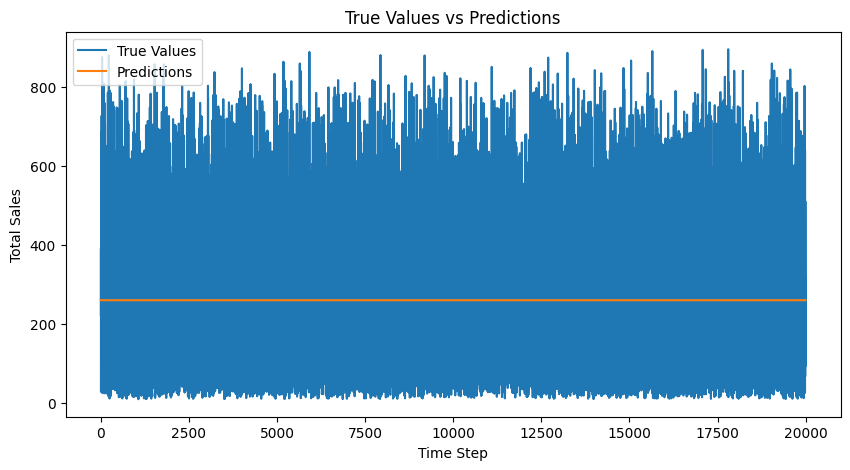

In [6]:
# Make predictions
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

# Inverse transform the y_test data
y_test_unscaled = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot the predictions against the true values
plt.figure(figsize=(10, 5))
plt.plot(y_test_unscaled, label='True Values')
plt.plot(predictions, label='Predictions')
plt.title('True Values vs Predictions')
plt.xlabel('Time Step')
plt.ylabel('Total Sales')
plt.legend()
plt.show()